In [114]:
from __future__ import print_function
import numpy as np
import os
import cv2
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,GlobalMaxPooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras import backend as K
%matplotlib inline

In [115]:
def rename(prev_path, new_path,val):
    os.makedirs(new_path)
    os.getcwd()
    collection = prev_path
    for i, filename in enumerate(os.listdir(collection)):
        os.rename(prev_path + filename, new_path + str(val)+"."+ str(i) + ".jpg")

In [116]:
prev_path='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/DermCNN data/1/'
one_path="D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/1/"
#rename(prev_path, one_path,val=1)

prev_path='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/DermCNN data/2/'
two_path="D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/2/"
#rename(prev_path, two_path,val=2)

prev_path='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/DermCNN data/3/'
three_path="D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/3/"
#rename(prev_path, three_path,val=3)

prev_path='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/DermCNN data/4/'
four_path="D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/4/"
#rename(prev_path, four_path,val=4)

prev_path='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/DermCNN data/5/'
five_path="D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/5/"
#rename(prev_path, five_path,val=5)

prev_path='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/DermCNN data/6/'
six_path="D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/6/"
#rename(prev_path, six_path,val=6)

prev_path='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/DermCNN data/7/'
seven_path="D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/7/"
#rename(prev_path, seven_path,val=7)

In [117]:
data = []
label = []
images= []
img_labels= []
im_width = 64
im_height = 64

In [118]:
def preprocessing(path):
    
    image_files = [ f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]    

    for file in image_files:
        image_file = str(path + file)   
        img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE) 
        new_img = cv2.resize(img, (im_width, im_height))
        
        pnt=file[:1]
        #if file[:1] == '1':
        label.append(pnt)
        data.append(new_img / 255)
    print(len(data))
    print(len(label))   

In [119]:
def augmentation(aug_path,bs,vl):
    (X_train, X_test, y_train, y_test) = train_test_split(data,label, test_size=0.30, random_state=42)
    
    K.set_image_dim_ordering('th')
    # load data
    #(X_train, y_train), (X_test, y_test) = mnist.load_data()
    # reshape to be [samples][pixels][width][height]
    X_train = X_train.reshape(X_train.shape[0], 1, 64, 64)
    X_test = X_test.reshape(X_test.shape[0], 1, 64, 64)
    # convert from int to float
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    # define data preparation
    shift = 0.2
    datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
    # fit parameters from data
    datagen.fit(X_train)
    # configure batch size and retrieve one batch of images
    #os.makedirs(aug_path)
    for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=bs, save_to_dir=aug_path, save_prefix=vl, save_format='jpg'):
        # create a grid of 3x3 images
        #for i in range(0, bs):
         #   pyplot.subplot(630 + 1 + i)
         #   pyplot.imshow(X_batch[i].reshape(64, 64), cmap=pyplot.get_cmap('gray'))
        # show the plot
        #pyplot.show()
        break

In [120]:
#preprocessing('D:\\University_MS\\1- FIRST SEMESTER\\Deep Learning\\Project\\Project3\\Dataset\\7\\')

#data = np.array(data)
#print(data.shape)
#data = data.reshape((data.shape)[0], (data.shape)[1], (data.shape)[2], 1)
#print(data.shape)
#label = np.array(label)
#print(label.shape)

#for x in range(1824):
#    augmentation('D:\\University_MS\\1- FIRST SEMESTER\\Deep Learning\\Project\\Project3\\Dataset\\7\\',1,7.1)

In [121]:
one = 'D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/1/'
two='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/2/'
three='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/3/'
four='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/4/'
five='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/5/'
six='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/6/'
seven='D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/Dataset/7/'

In [122]:
one_image_files = [ f for f in os.listdir(one) if os.path.isfile(os.path.join(one,f)) ]
two_image_files = [ f for f in os.listdir(two) if os.path.isfile(os.path.join(two,f)) ]
three_image_files = [ f for f in os.listdir(three) if os.path.isfile(os.path.join(three,f)) ]
four_image_files = [ f for f in os.listdir(four) if os.path.isfile(os.path.join(four,f)) ]
five_image_files = [ f for f in os.listdir(five) if os.path.isfile(os.path.join(five,f)) ]
six_image_files = [ f for f in os.listdir(six) if os.path.isfile(os.path.join(six,f)) ]
seven_image_files = [ f for f in os.listdir(seven) if os.path.isfile(os.path.join(seven,f)) ]

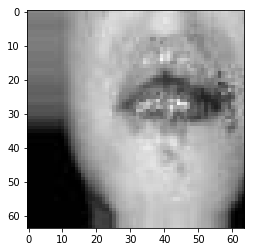

In [123]:
image_file = str(four + four_image_files[62])
img = cv2.imread(image_file)
plt.imshow(img)

In [124]:
print(len(one_image_files)) 
print(len(two_image_files))
print(len(three_image_files))
print(len(four_image_files))
print(len(five_image_files))
print(len(six_image_files))
print(len(seven_image_files))

1979
1784
1872
1876
1878
1879
1874


In [125]:
def preprocessing(path,image_files,lab):
    
    progress = 0
    
    for file in image_files:
        
        image_file = str(path + file)
        img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img, (im_width, im_height))
        img=new_img.astype('float32')
        img_labels.append(lab)
        images.append(img / 255)
        
        progress = progress + 1
        if progress % 1000 == 0:
            print('Progress: ' + str(progress) + ' Images Done')
        

In [126]:
l=1
preprocessing(one,one_image_files,l)
l=2
preprocessing(two,two_image_files,l)
l=3
preprocessing(three,three_image_files,l)
l=4
preprocessing(four,four_image_files,l)
l=5
preprocessing(five,five_image_files,l)
l=6
preprocessing(six,six_image_files,l)
l=7
preprocessing(seven,seven_image_files,l)

print(len(images))
print(len(img_labels))    

Progress: 1000 Images Done
Progress: 1000 Images Done
Progress: 1000 Images Done
Progress: 1000 Images Done
Progress: 1000 Images Done
Progress: 1000 Images Done
Progress: 1000 Images Done
13142
13142


In [127]:
images,img_labels= shuffle(images,img_labels)

In [128]:
print(img_labels[1000])

3


In [129]:
images = np.array(images)
print(images.shape)
# Converting it into a Tensor
images = images.reshape((images.shape)[0],(images.shape)[1], (images.shape)[2],1)
print(images.shape)
img_labels = np.array(img_labels)
print(img_labels.shape)

(13142, 64, 64)
(13142, 64, 64, 1)
(13142,)


In [130]:
# partition the data into training and testing splits using 70% of the data for training and the remaining 30% for testing
(trainX, testX, trainY, testY) = train_test_split(images,img_labels, test_size=0.30, random_state=2018)


In [134]:
batch_size = 64
epochs = 49
im_width = 64
im_height = 64
num_classes=8

In [135]:
# convert class vectors to binary class matrices
trainY = keras.utils.to_categorical(trainY, num_classes)
testY = keras.utils.to_categorical(testY, num_classes)

In [136]:
model = Sequential()

model.add(Conv2D(10, kernel_size=(2, 2),activation='relu',input_shape= (im_width , im_height,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(30, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
#model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer="adadelta",loss="categorical_crossentropy",metrics=["accuracy"])

History =model.fit(trainX,trainY,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, testY)
                )

score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("CNN Error: %.2f%%" % (100-score[1]*100))

Train on 9199 samples, validate on 3943 samples
Epoch 1/49
9199/9199 [==============================] - 41s 4ms/step - loss: 1.8487 - acc: 0.2411 - val_loss: 1.6657 - val_acc: 0.3797
Epoch 2/49
9199/9199 [==============================] - 24s 3ms/step - loss: 1.5634 - acc: 0.4080 - val_loss: 1.4383 - val_acc: 0.4623
Epoch 3/49
9199/9199 [==============================] - 26s 3ms/step - loss: 1.4054 - acc: 0.4717 - val_loss: 1.2539 - val_acc: 0.5547
Epoch 4/49
9199/9199 [==============================] - 25s 3ms/step - loss: 1.2586 - acc: 0.5353 - val_loss: 1.1533 - val_acc: 0.5848
Epoch 5/49
9199/9199 [==============================] - 26s 3ms/step - loss: 1.1351 - acc: 0.5858 - val_loss: 1.0767 - val_acc: 0.6054
Epoch 6/49
9199/9199 [==============================] - 26s 3ms/step - loss: 1.0164 - acc: 0.6279 - val_loss: 0.9142 - val_acc: 0.6873
Epoch 7/49
9199/9199 [==============================] - 25s 3ms/step - loss: 0.9105 - acc: 0.6733 - val_loss: 0.8132 - val_acc: 0.7258
Epoch 8

In [137]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 63, 63, 10)        50        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 29, 29, 15)        1365      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 15)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 30)        11280     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 30)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 30)          0         
__________

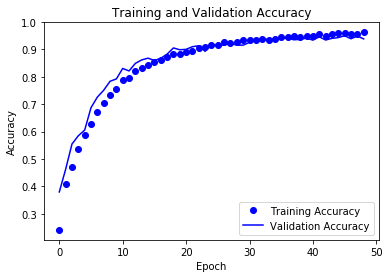

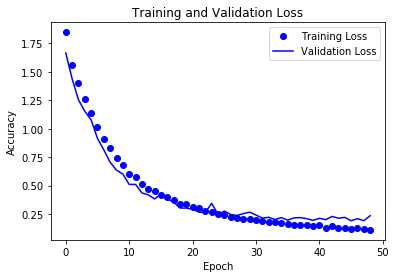

In [138]:
# Training and Validation Accuracy/loss plot below:

accuracy = History.history['acc']
val_accuracy = History.history['val_acc']
loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [139]:
model.save_weights('D:/University_MS/1- FIRST SEMESTER/Deep Learning/Project/Project3/part1_weights.h5')